<a href="https://colab.research.google.com/github/juniobarret/Machine-Learning/blob/main/K_MEANS_ERNANE_BARRETO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando bibliotecas e conjuntos de dados necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

OS TIPOS DE IRIS SÃO: SETOSA , VERSICOLOR, VIRGINICA

In [ ]:
# Carregando o novo dataset
data = pd.read_csv("/content/IRIS.csv")

# Renomeando as colunas para o português
data.columns = ['ComprimentoSepala', 'LarguraSepala', 'ComprimentoPetala', 'LarguraPetala', 'Especie']

In [ ]:
# Visualizando as primeiras linhas do dataset
data.head(10)

,ComprimentoSepala,LarguraSepala,ComprimentoPetala,LarguraPetala,Especie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
# Convertendo classes de espécies para valores numéricos usando LabelEncoder
le = LabelEncoder()
data['Especie'] = le.fit_transform(data['Especie']) + 1

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ComprimentoSepala  150 non-null    float64
 1   LarguraSepala      150 non-null    float64
 2   ComprimentoPetala  150 non-null    float64
 3   LarguraPetala      150 non-null    float64
 4   Especie            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
data.shape

(150, 5)

In [ ]:
# Separando características (X) e rótulos (Y)
X = data.iloc[:, 1:5].values
Y = data['Especie'].values

In [ ]:
# Dimensionamento de recursos usando MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X_scaled = sc.fit_transform(X)

In [ ]:
# Criando um DataFrame com os dados dimensionados
data_scaled = pd.DataFrame(X_scaled, columns=['ComprimentoSepala', 'LarguraSepala', 'ComprimentoPetala', 'LarguraPetala'])

In [ ]:
# Adicionando a coluna 'Especie' ao DataFrame escalado
data_scaled['Especie'] = Y

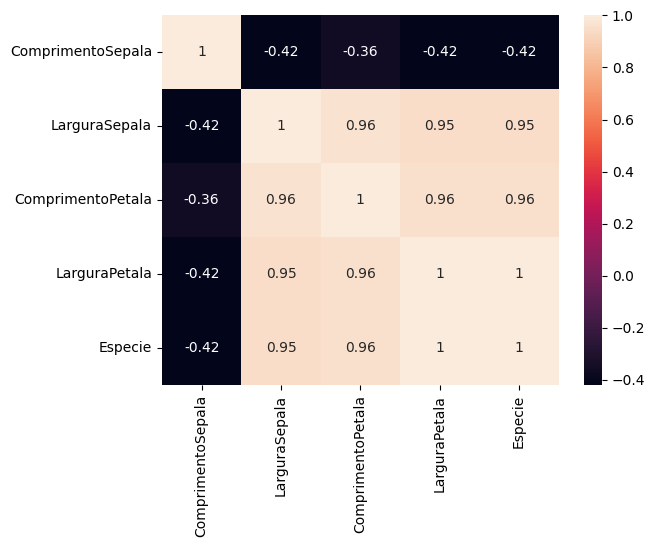

In [ ]:
# Mapa de calor
sns.heatmap(data_scaled.corr(), annot=True)
plt.show()

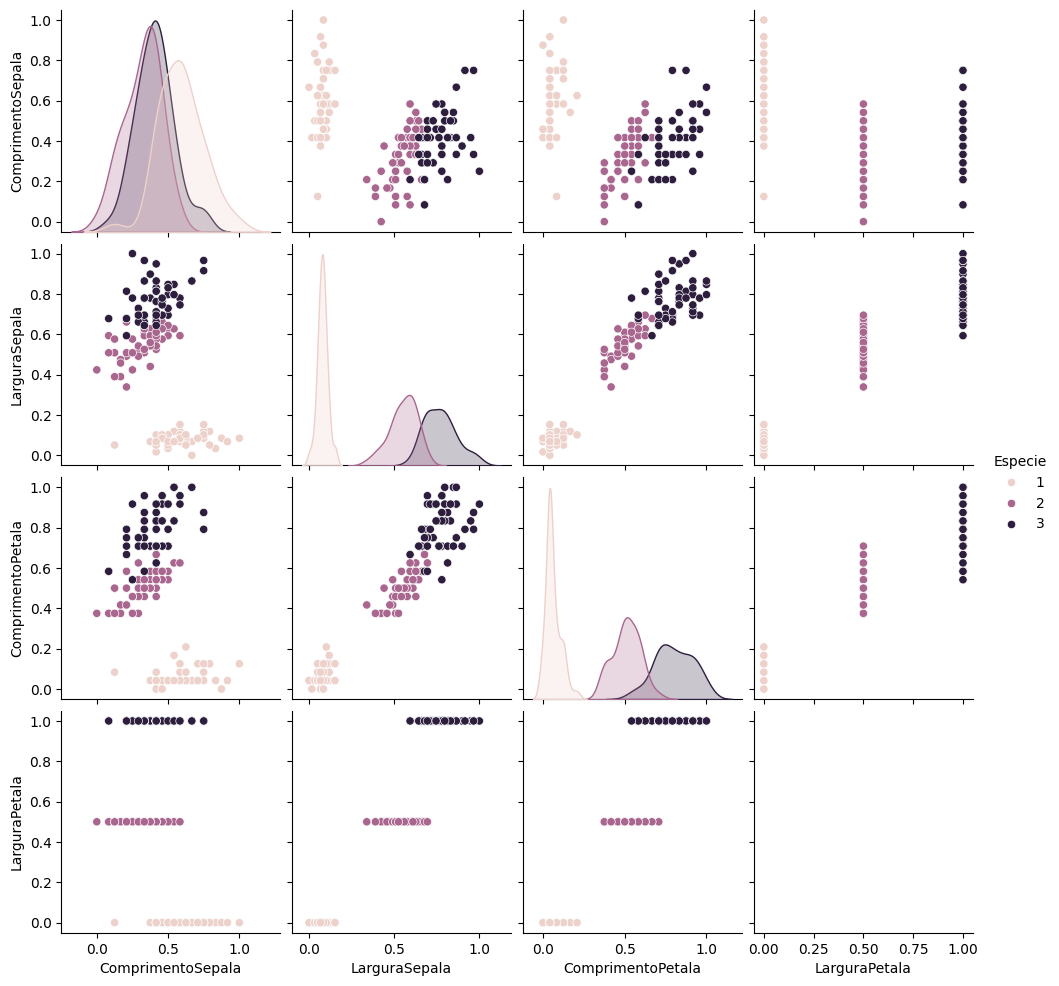

In [ ]:
# Distribuição detalhada das features no conjunto de dados
sns.pairplot(data=data_scaled, hue='Especie')
plt.show()

In [ ]:
# Dividindo X e Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.20, random_state=42, stratify=Y)


In [ ]:
# Verificando dimensões
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", len(Y_train))
print("Y_test shape:", len(Y_test))

X_train shape: (120, 4)
X_test shape: (30, 4)
Y_train shape: 120
Y_test shape: 30


In [ ]:
# Aplicando KMeans
import sklearn
from sklearn.cluster import KMeans
KMeans_Clustering = KMeans(n_clusters=3, random_state=0)
KMeans_Clustering.fit(X_train)

print(KMeans_Clustering.cluster_centers_)

[[0.584375   0.08135593 0.06354167 0.        ]
 [0.40833333 0.77627119 0.80833333 1.        ]
 [0.3125     0.55127119 0.50833333 0.5       ]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Previsão usando KMeans e métricas de precisão
kpred = KMeans_Clustering.predict(X_test)

print('Classification report:\n\n', sklearn.metrics.classification_report(Y_test, kpred))

Classification report:

               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00        10
           2       1.00      1.00      1.00        10
           3       0.00      0.00      0.00        10

    accuracy                           0.33        30
   macro avg       0.25      0.25      0.25        30
weighted avg       0.33      0.33      0.33        30



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

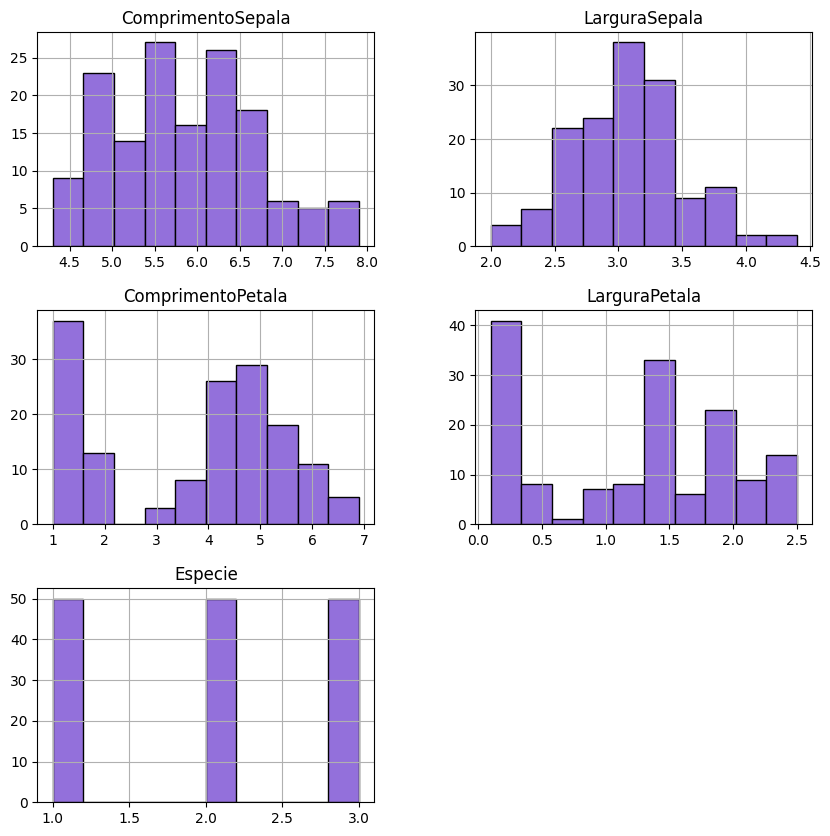

In [ ]:
data.hist(color= 'mediumpurple' ,edgecolor='black',figsize=(10,10))
plt.show()

Confusion Matrix :


<Axes: >

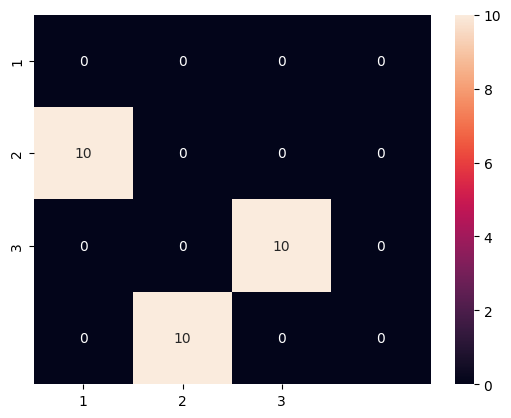

In [ ]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix
print("Confusion Matrix :")
species_labels = sorted(data['Especie'].unique())
sns.heatmap(
    confusion_matrix(Y_test, kpred),
    annot=True,
    xticklabels=species_labels,
    yticklabels=species_labels
)

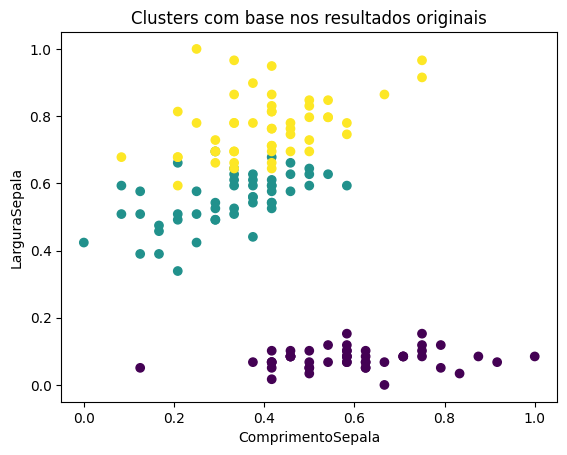

In [ ]:
# Visualizando clusters com base nos resultados originais
plt.scatter(data_scaled['ComprimentoSepala'], data_scaled['LarguraSepala'], c=data_scaled['Especie'], cmap='viridis')
plt.title('Clusters com base nos resultados originais')
plt.xlabel('ComprimentoSepala')
plt.ylabel('LarguraSepala')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


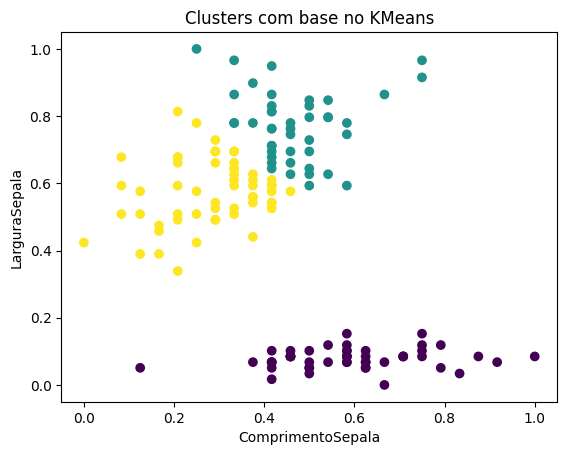

In [ ]:

# Treinamento do KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data_scaled[['ComprimentoSepala', 'LarguraSepala']])

# Adicionando rótulos ao DataFrame
data_scaled['Cluster'] = kmeans.labels_

# Visualizando clusters com base no KMeans
plt.scatter(data_scaled['ComprimentoSepala'], data_scaled['LarguraSepala'], c=data_scaled['Cluster'], cmap='viridis')
plt.title('Clusters com base no KMeans')
plt.xlabel('ComprimentoSepala')
plt.ylabel('LarguraSepala')
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def classificar_knn(X_train, y_train, X_test, y_test, k):
    # Criando e treinando o modelo k-NN
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    # Realizando previsões no conjunto de teste
    y_pred = knn_model.predict(X_test)

    # Calculando a precisão do modelo
    accuracy = accuracy_score(y_test, y_pred)

    return y_pred, accuracy

# Supondo que você tenha carregado o dataset Iris em 'data'
X = data_scaled[['ComprimentoSepala', 'LarguraSepala', 'ComprimentoPetala']]
y = data_scaled['Especie']

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Utilizando a função para classificação com k-NN
k_vizinhos = 3
previsoes, precisao = classificar_knn(X_train, y_train, X_test, y_test, k_vizinhos)

print(f"Previsões: {previsoes}")
print(f"Precisão do modelo: {precisao}")


Previsões: [2 1 3 2 2 1 2 3 2 2 3 1 1 1 1 2 3 2 2 3 1 3 1 3 3 3 3 3 1 1]
Precisão do modelo: 1.0
